In [1]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Final_Project\Log\UNSML.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Final_Project\Data\Preprosessed_data\Da_Mis_Val.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [2]:
df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Final_Project\Data\Preprosessed_data\Da_Mis_Val.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2022 non-null   int64 
 1   name         2022 non-null   object
 2   birth_date   2022 non-null   object
 3   birth_place  2022 non-null   object
 4   death_date   2022 non-null   object
 5   death_place  2022 non-null   object
 6   occupation   2022 non-null   object
 7   awards       2022 non-null   object
 8   alma_mater   2022 non-null   object
 9   education    2022 non-null   object
 10  spouse       2022 non-null   object
 11  children     2022 non-null   object
dtypes: int64(1), object(11)
memory usage: 189.7+ KB


In [3]:
column_names = df.columns.tolist()
print(column_names)

['Unnamed: 0', 'name', 'birth_date', 'birth_place', 'death_date', 'death_place', 'occupation', 'awards', 'alma_mater', 'education', 'spouse', 'children']


In [4]:
df.head()

,Unnamed: 0,name,birth_date,birth_place,death_date,death_place,occupation,awards,alma_mater,education,spouse,children
0,0,Isaac Newton,{{Birth date|df=y|1643|01|04}},"{{nowrap|[[Woolsthorpe-by-Colsterworth]],}} Li...",{{Death date and age|df=y|1727|03|31|1643|01|04}},"[[Kensington]], Middlesex, England",Composer,{{unbulleted list | [[Fellow of the Royal Soci...,[[King's College London]],"[[Trinity College, Cambridge]] ([[Bachelor of ...",{{plainlist|,2
1,1,Marie Curie,{{birth date|df=y|1867|11|7}},"[[Warsaw]], [[Congress Poland|Poland]], Russia...",{{death date and age|df=y|1934|7|4|1867|11|7}},"[[Passy, Haute-Savoie|Passy]], [[Rhône-Alpes]]...",Composer,}},[[University of Paris]],[[Visva-Bharati University]] (dropped out)<ref...,{{plainlist|,2
2,2,Albert Einstein,{{Birth date|df=yes|1879|3|14}},"[[Ulm]], [[Kingdom of Württemberg]], Germany<r...",{{Death date and age|df=yes|1955|4|18|1879|3|14}},"[[Princeton, New Jersey]], U.S.",Composer,}},[[King's College London]],[[Visva-Bharati University]] (dropped out)<ref...,{{plainlist|,{{flatlist|
3,3,The Countess of Lovelace,{{birth date|df=y|1815|12|10}},"London, England",{{death date and age|df=y|1852|11|27|1815|12|10}},"[[Marylebone]], London, England",Composer,}},[[King's College London]],[[Visva-Bharati University]] (dropped out)<ref...,"{{marriage|[[William King-Noel, 1st Earl of Lo...",{{plainlist|
4,4,Leonardo da Vinci,{{birth date|df=yes|1452|04|15}},"possibly [[Anchiano]],{{efn|name=Birthplace}} ...",{{death date and age|df=yes|1519|5|2|1452|4|15}},"[[Clos Lucé]], [[Amboise]], {{awrap|[[Kingdom ...",Composer,}},[[King's College London]],Studio of [[Andrea del Verrocchio]],{{plainlist|,2


# Occupation-based Clustering (K-Means)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# 1. Kasb ustuni
df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Final_Project\Data\Preprosessed_data\Da_Mis_Val.csv")  # o'zingizning faylingiz nomini yozing
occupations = df['occupation'].fillna('')

# 2. TF-IDF orqali raqamlashtirish
vectorizer = TfidfVectorizer()
X_occ = vectorizer.fit_transform(occupations)

# 3. K-means
kmeans_occ = KMeans(n_clusters=5, random_state=42)
df['occupation_cluster'] = kmeans_occ.fit_predict(X_occ)

print(df[['name', 'occupation', 'occupation_cluster']].head())


                       name occupation  occupation_cluster
0              Isaac Newton   Composer                   0
1               Marie Curie   Composer                   0
2           Albert Einstein   Composer                   0
3  The Countess of Lovelace   Composer                   0
4         Leonardo da Vinci   Composer                   0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2022 non-null   int64 
 1   name                2022 non-null   object
 2   birth_date          2022 non-null   object
 3   birth_place         2022 non-null   object
 4   death_date          2022 non-null   object
 5   death_place         2022 non-null   object
 6   occupation          2022 non-null   object
 7   awards              2022 non-null   object
 8   alma_mater          2022 non-null   object
 9   education           2022 non-null   object
 10  spouse              2022 non-null   object
 11  children            2022 non-null   object
 12  occupation_cluster  2022 non-null   int32 
dtypes: int32(1), int64(1), object(11)
memory usage: 197.6+ KB


In [13]:
import pandas as pd

# Faqat yil (birinchi 4 raqam) ni olish
df['birth_year'] = df['birth_date'].astype(str).str.extract(r'(\d{4})').astype(float)
df['death_year'] = df['death_date'].astype(str).str.extract(r'(\d{4})').astype(float)

# Umr davomiyligini hisoblash
df['life_span'] = df['death_year'] - df['birth_year']

# Tekshirib ko‘ring
print(df[['birth_date', 'birth_year', 'death_date', 'death_year', 'life_span']].head())


                         birth_date  birth_year  \
0    {{Birth date|df=y|1643|01|04}}      1643.0   
1     {{birth date|df=y|1867|11|7}}      1867.0   
2   {{Birth date|df=yes|1879|3|14}}      1879.0   
3    {{birth date|df=y|1815|12|10}}      1815.0   
4  {{birth date|df=yes|1452|04|15}}      1452.0   

                                          death_date  death_year  life_span  
0  {{Death date and age|df=y|1727|03|31|1643|01|04}}      1727.0       84.0  
1     {{death date and age|df=y|1934|7|4|1867|11|7}}      1934.0       67.0  
2  {{Death date and age|df=yes|1955|4|18|1879|3|14}}      1955.0       76.0  
3  {{death date and age|df=y|1852|11|27|1815|12|10}}      1852.0       37.0  
4   {{death date and age|df=yes|1519|5|2|1452|4|15}}      1519.0       67.0  


# Life Span Clustering (Hierarchical)

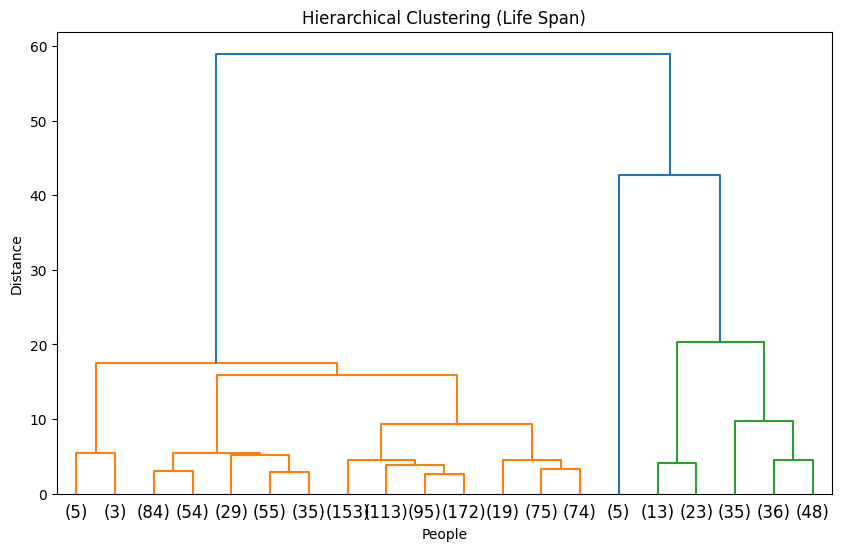

                       name  birth_year  death_year  life_span  \
0              Isaac Newton      1643.0      1727.0       84.0   
1               Marie Curie      1867.0      1934.0       67.0   
2           Albert Einstein      1879.0      1955.0       76.0   
3  The Countess of Lovelace      1815.0      1852.0       37.0   
4         Leonardo da Vinci      1452.0      1519.0       67.0   

   life_span_cluster  
0                2.0  
1                2.0  
2                2.0  
3                2.0  
4                5.0  


In [14]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# 1. NaN bo‘lmagan satrlarni ajratish
life_data = df[['birth_year', 'death_year', 'life_span']].dropna()

# 2. Standartlashtirish
scaler = StandardScaler()
life_scaled = scaler.fit_transform(life_data)

# 3. Hierarchical clustering
linked = linkage(life_scaled, method='ward')

# 4. Dendrogram chizish
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title('Hierarchical Clustering (Life Span)')
plt.xlabel("People")
plt.ylabel("Distance")
plt.show()

# 5. Cluster raqamlarini berish
df.loc[life_data.index, 'life_span_cluster'] = fcluster(linked, 5, criterion='maxclust')

# Natijani ko‘rish
print(df[['name', 'birth_year', 'death_year', 'life_span', 'life_span_cluster']].head())

In [12]:
print(df['birth_date'].dropna().head(10))
print(df['death_date'].dropna().head(10))


0                       {{Birth date|df=y|1643|01|04}}
1                        {{birth date|df=y|1867|11|7}}
2                      {{Birth date|df=yes|1879|3|14}}
3                       {{birth date|df=y|1815|12|10}}
4                     {{birth date|df=yes|1452|04|15}}
5    {{birth date|1564|02|15|df=y}}{{sfn|Drake|1978...
6                        {{birth date|1856|7|10|df=y}}
7                        {{birth date|df=y|1809|2|12}}
8                             {{Birth date|1847|2|11}}
9                    {{Birth date and age|1984|10|18}}
Name: birth_date, dtype: object
0    {{Death date and age|df=y|1727|03|31|1643|01|04}}
1       {{death date and age|df=y|1934|7|4|1867|11|7}}
2    {{Death date and age|df=yes|1955|4|18|1879|3|14}}
3    {{death date and age|df=y|1852|11|27|1815|12|10}}
4     {{death date and age|df=yes|1519|5|2|1452|4|15}}
5    {{death date and age|1642|01|08|1564|02|15|df=y}}
6       {{death date and age|1943|1|7|1856|7|10|df=y}}
7      {{death date and age|1882|

# Education & Awards Based Clustering (K-Means)

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD

# 1. Ta’lim va mukofotlar
text_data = df[['education', 'awards']].fillna('').agg(' '.join, axis=1)

# 2. TF-IDF
tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(text_data)

# 3. Ixtiyoriy: o'lchamni kamaytirish
svd = TruncatedSVD(n_components=50, random_state=42)
X_reduced = svd.fit_transform(X_text)

# 4. K-Means
kmeans_edu_award = KMeans(n_clusters=5, random_state=42)
df['edu_award_cluster'] = kmeans_edu_award.fit_predict(X_reduced)


# Combined Biographical Clustering (K-Means)

In [18]:
X_final_dense = X_final.toarray()
import numpy as np
print(f'NaN count: {np.isnan(X_final_dense).sum()}')

# NaN larni 0 ga almashtirish (yoki SimpleImputer bilan to'ldirish)
X_final_clean = np.nan_to_num(X_final_dense, nan=0)

# KMeans
from sklearn.cluster import KMeans
kmeans_final = KMeans(n_clusters=6, random_state=42)
combined_data['combined_cluster'] = kmeans_final.fit_predict(X_final_clean)


NaN count: 6038


In [21]:
import re

def extract_year(date_str):
    # Pattern: | followed by 4 raqamli yil
    match = re.search(r'\|(\d{4})\|', date_str)
    if match:
        return int(match.group(1))
    else:
        return None

df['birth_year'] = df['birth_date'].apply(extract_year)
df['death_year'] = df['death_date'].apply(extract_year)
df['life_span'] = df['death_year'] - df['birth_year']


In [22]:
print(df[['birth_year', 'death_year', 'life_span']].isnull().sum())
# Null qiymatlari bo'lgan satrlarni o'chirish:
df_clean = df.dropna(subset=['birth_year', 'death_year', 'life_span'])


birth_year     261
death_year     969
life_span     1065
dtype: int64


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

# Matn ustunlarini birlashtirish
text_cols = ['occupation', 'awards', 'alma_mater', 'education', 'spouse', 'children']
df_clean['text'] = df_clean[text_cols].fillna('').agg(' '.join, axis=1)

numerics = ['birth_year', 'death_year', 'life_span']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerics),
    ('text', TfidfVectorizer(max_features=300), 'text')
])

X_final = preprocessor.fit_transform(df_clean)

kmeans_final = KMeans(n_clusters=6, random_state=42)
df_clean['combined_cluster'] = kmeans_final.fit_predict(X_final)

print(df_clean[['name', 'combined_cluster']].head())

                       name  combined_cluster
0              Isaac Newton                 5
1               Marie Curie                 1
2           Albert Einstein                 1
3  The Countess of Lovelace                 0
4         Leonardo da Vinci                 5


C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_16316\1036821414.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text'] = df_clean[text_cols].fillna('').agg(' '.join, axis=1)
C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_16316\1036821414.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['combined_cluster'] = kmeans_final.fit_predict(X_final)


In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_clusters(X, labels, title='Cluster Visualization (PCA)'):
    # Reduce dimensions
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


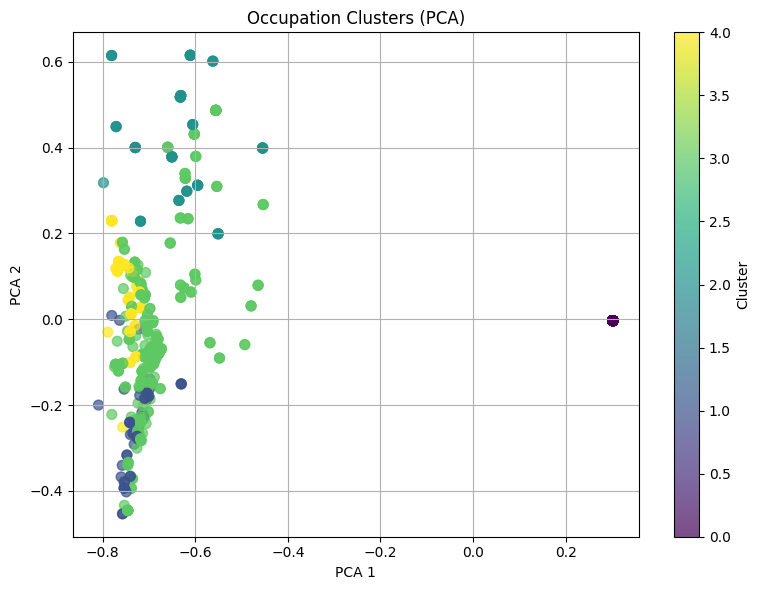

In [10]:
# Agar siz TF-IDF dan foydalangan bo‘lsangiz:
plot_clusters(X_occ.toarray(), df['occupation_cluster'], title='Occupation Clusters (PCA)')


# education + awards uchun:

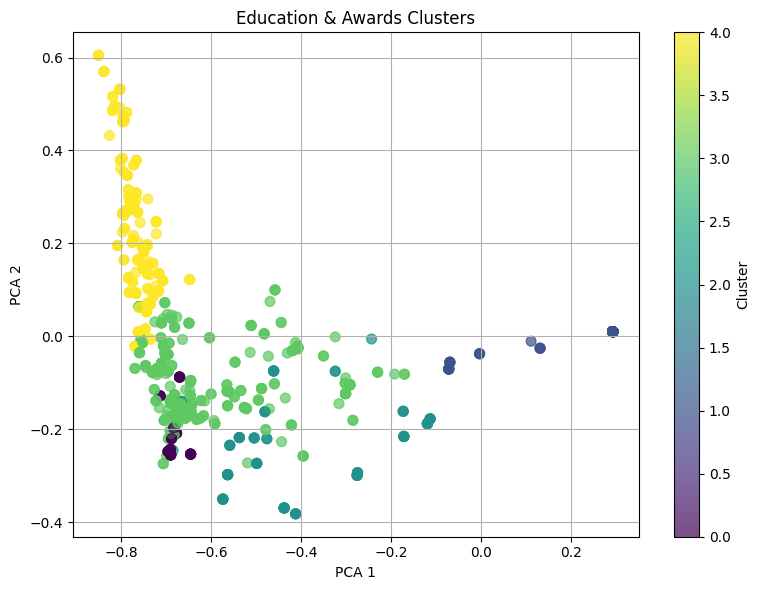

In [24]:
plot_clusters(X_reduced, df['edu_award_cluster'], title='Education & Awards Clusters')

# combined biographical clustering

In [30]:
# NaN larni aniqlash
print(df[['birth_year', 'death_year']].isna().sum())


birth_year    1994
death_year    2022
dtype: int64


In [31]:
df = df.dropna(subset=['birth_year', 'death_year'])


In [32]:
df['life_span'] = df['death_year'] - df['birth_year']


In [37]:
text_series = df[existing_text_cols].fillna('').agg(' '.join, axis=1)
print(type(text_series))
print(text_series.head())
print(text_series.shape, df.shape)


<class 'pandas.core.frame.DataFrame'>
Empty DataFrame
Columns: [occupation, awards, alma_mater, education, spouse, children]
Index: []
(0, 6) (0, 19)


In [38]:
# 1. df ning asl o'lchamini tekshiring
print("Original df shape:", df.shape)

# 2. mavjud matn ustunlarini tekshiring
existing_text_cols = [col for col in ['occupation', 'awards', 'alma_mater', 'education', 'spouse', 'children'] if col in df.columns]
print("Existing text columns:", existing_text_cols)

# 3. df ning shu ustunlar bo'yicha boshidan bir nechta satrini ko'ring
print(df[existing_text_cols].head())

# 4. Agar df bo'sh bo'lsa, avvalgi koddan qayerda bo'shliq paydo bo'lganini tekshiring


Original df shape: (0, 19)
Existing text columns: ['occupation', 'awards', 'alma_mater', 'education', 'spouse', 'children']
Empty DataFrame
Columns: [occupation, awards, alma_mater, education, spouse, children]
Index: []


In [40]:
import re

def extract_year(date_str):
    match = re.search(r'\|(\d{4})\|', date_str)
    if match:
        return int(match.group(1))
    else:
        return None

df['birth_year'] = df['birth_date'].apply(extract_year)
df['death_year'] = df['death_date'].apply(extract_year)

df = df.dropna(subset=['birth_year', 'death_year'])


In [42]:
print(df.shape)
print(df.head())
print(df[['birth_year', 'death_year', 'life_span']].info())
print(df[['birth_year', 'death_year', 'life_span']].isna().sum())


(0, 19)
Empty DataFrame
Columns: [Unnamed: 0, name, birth_date, birth_place, death_date, death_place, occupation, awards, alma_mater, education, spouse, children, occupation_cluster, birth_year, death_year, life_span, life_span_cluster, edu_award_cluster, text]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  0 non-null      object
 1   death_year  0 non-null      object
 2   life_span   0 non-null      int32 
dtypes: int32(1), object(2)
memory usage: 0.0+ bytes
None
birth_year    0
death_year    0
life_span     0
dtype: int64


In [43]:
import re
import pandas as pd

def extract_year(s):
    if pd.isna(s):
        return None
    match = re.search(r'\|(\d{4})\|', s)
    if match:
        return int(match.group(1))
    else:
        return None

df['birth_year'] = df['birth_date'].apply(extract_year)
df['death_year'] = df['death_date'].apply(extract_year)

print(df[['birth_year', 'death_year']].head(10))

df = df.dropna(subset=['birth_year', 'death_year'])

df['life_span'] = df['death_year'] - df['birth_year']

print(df.shape)
print(df.head())


Empty DataFrame
Columns: [birth_year, death_year]
Index: []
(0, 19)
Empty DataFrame
Columns: [Unnamed: 0, name, birth_date, birth_place, death_date, death_place, occupation, awards, alma_mater, education, spouse, children, occupation_cluster, birth_year, death_year, life_span, life_span_cluster, edu_award_cluster, text]
Index: []


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          0 non-null      int64  
 1   name                0 non-null      object 
 2   birth_date          0 non-null      object 
 3   birth_place         0 non-null      object 
 4   death_date          0 non-null      object 
 5   death_place         0 non-null      object 
 6   occupation          0 non-null      object 
 7   awards              0 non-null      object 
 8   alma_mater          0 non-null      object 
 9   education           0 non-null      object 
 10  spouse              0 non-null      object 
 11  children            0 non-null      object 
 12  occupation_cluster  0 non-null      int32  
 13  birth_year          0 non-null      object 
 14  death_year          0 non-null      object 
 15  life_span           0 non-null      object 
 16  life_span_cluster   0 non